# Data Preprocessing, EDA, and Feature Engineering

This notebook contains:
1. **Data Loading and Initial Exploration**
2. **Exploratory Data Analysis (EDA)**
3. **Data Cleaning and Preprocessing**
4. **Feature Engineering**
5. **Data Validation and Export**


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading and Initial Exploration


In [2]:
# Load the dataset
CSV_PATH = r"data/train(1)(train(1)).csv"
IMAGE_DIR = r"property_images_v2"

df = pd.read_csv(CSV_PATH)
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (16209, 21)

Columns: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

First few rows:


id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  6700390210  20140708T000000  245000         3       2.50         1600   
2  7212660540  20150115T000000  200000         4       2.50         1720   
3  8562780200  20150427T000000  352499         2       2.25         1240   
4  7760400350  20141205T000000  232000         3       2.00         1280   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9240     2.0           0     0  ...      7        1810              0   
1      2788     2.0           0     0  ...      7        1600              0   
2      8638     2.0           0     0  ...      8        1720              0   
3       705     2.0           0     0  ...      7        1150             90   
4     13356     1.0           0     0  ...      7        1280              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1961             0    98055  47.4362 -122.187           1660   
1      1992             0    98031  47.4034 -122.187           1720   
2      1994             0    98003  47.2704 -122.313           1870   
3      2009             0    98027  47.5321 -122.073           1240   
4      1994             0    98042  47.3715 -122.074           1590   

   sqft_lot15  
0        9240  
1        3605  
2        7455  
3         750  
4        8071  

[5 rows x 21 columns]

In [3]:
# Basic dataset information
print("="*50)
print("DATASET INFORMATION")
print("="*50)
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


DATASET INFORMATION
Total rows: 16209
Total columns: 21

Data types:
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Missing values:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15 

id         price     bedrooms     bathrooms   sqft_living  \
count  1.620900e+04  1.620900e+04  16209.00000  16209.000000  16209.000000   
mean   4.575771e+09  5.374703e+05      3.36782      2.113054   2073.274601   
std    2.874661e+09  3.603036e+05      0.93327      0.765242    907.009491   
min    1.000102e+06  7.500000e+04      0.00000      0.000000    290.000000   
25%    2.123049e+09  3.200000e+05      3.00000      1.500000   1430.000000   
50%    3.904950e+09  4.500000e+05      3.00000      2.250000   1910.000000   
75%    7.304301e+09  6.400000e+05      4.00000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.00000      8.000000  12050.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.620900e+04  16209.000000  16209.000000  16209.000000  16209.000000   
mean   1.486767e+04      1.498828      0.006971      0.234253      3.407860   
std    3.882570e+04      0.543032      0.083206      0.763152      0.651553   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.004000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.599000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.063100e+04      2.000000      0.000000      0.000000      4.000000   
max    1.164794e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  16209.000000  16209.000000   16209.000000  16209.000000  16209.000000   
mean       7.652971   1784.754396     288.520205   1971.152755     82.738108   
std        1.171050    821.820844     438.598910     29.372698    397.861148   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1952.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2200.000000     560.000000   1997.000000      0.000000   
max       13.000000   8860.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  16209.000000  16209.000000  16209.000000   16209.000000   16209.000000  
mean   98077.974767     47.560707   -122.214003    1983.152261   12735.572707  
std       53.355282      0.138340      0.140093     681.905161   26933.162012  
min    98001.000000     47.159300   -122.519000     399.000000     651.000000  
25%    98033.000000     47.472500   -122.328000    1480.000000    5098.000000  
50%    98065.000000     47.572400   -122.230000    1840.000000    7620.000000  
75%    98117.000000     47.678200   -122.125000    2360.000000   10053.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## 2. Exploratory Data Analysis (EDA)


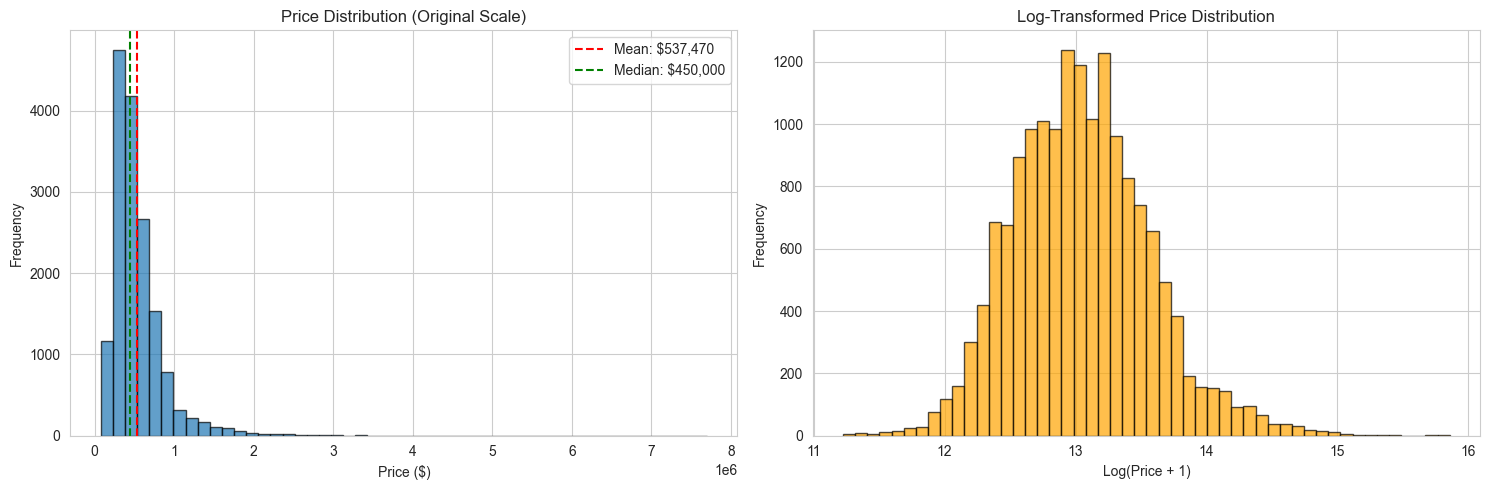

Price Statistics:
Min: $75,000.00
Max: $7,700,000.00
Mean: $537,470.28
Median: $450,000.00
Std: $360,303.58
Skewness: 4.03


In [4]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Price distribution
axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Price Distribution (Original Scale)')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['price'].mean(), color='r', linestyle='--', label=f'Mean: ${df["price"].mean():,.0f}')
axes[0].axvline(df['price'].median(), color='g', linestyle='--', label=f'Median: ${df["price"].median():,.0f}')
axes[0].legend()

# Log-transformed price distribution
axes[1].hist(np.log1p(df['price']), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Log-Transformed Price Distribution')
axes[1].set_xlabel('Log(Price + 1)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Price Statistics:")
print(f"Min: ${df['price'].min():,.2f}")
print(f"Max: ${df['price'].max():,.2f}")
print(f"Mean: ${df['price'].mean():,.2f}")
print(f"Median: ${df['price'].median():,.2f}")
print(f"Std: ${df['price'].std():,.2f}")
print(f"Skewness: {df['price'].skew():.2f}")


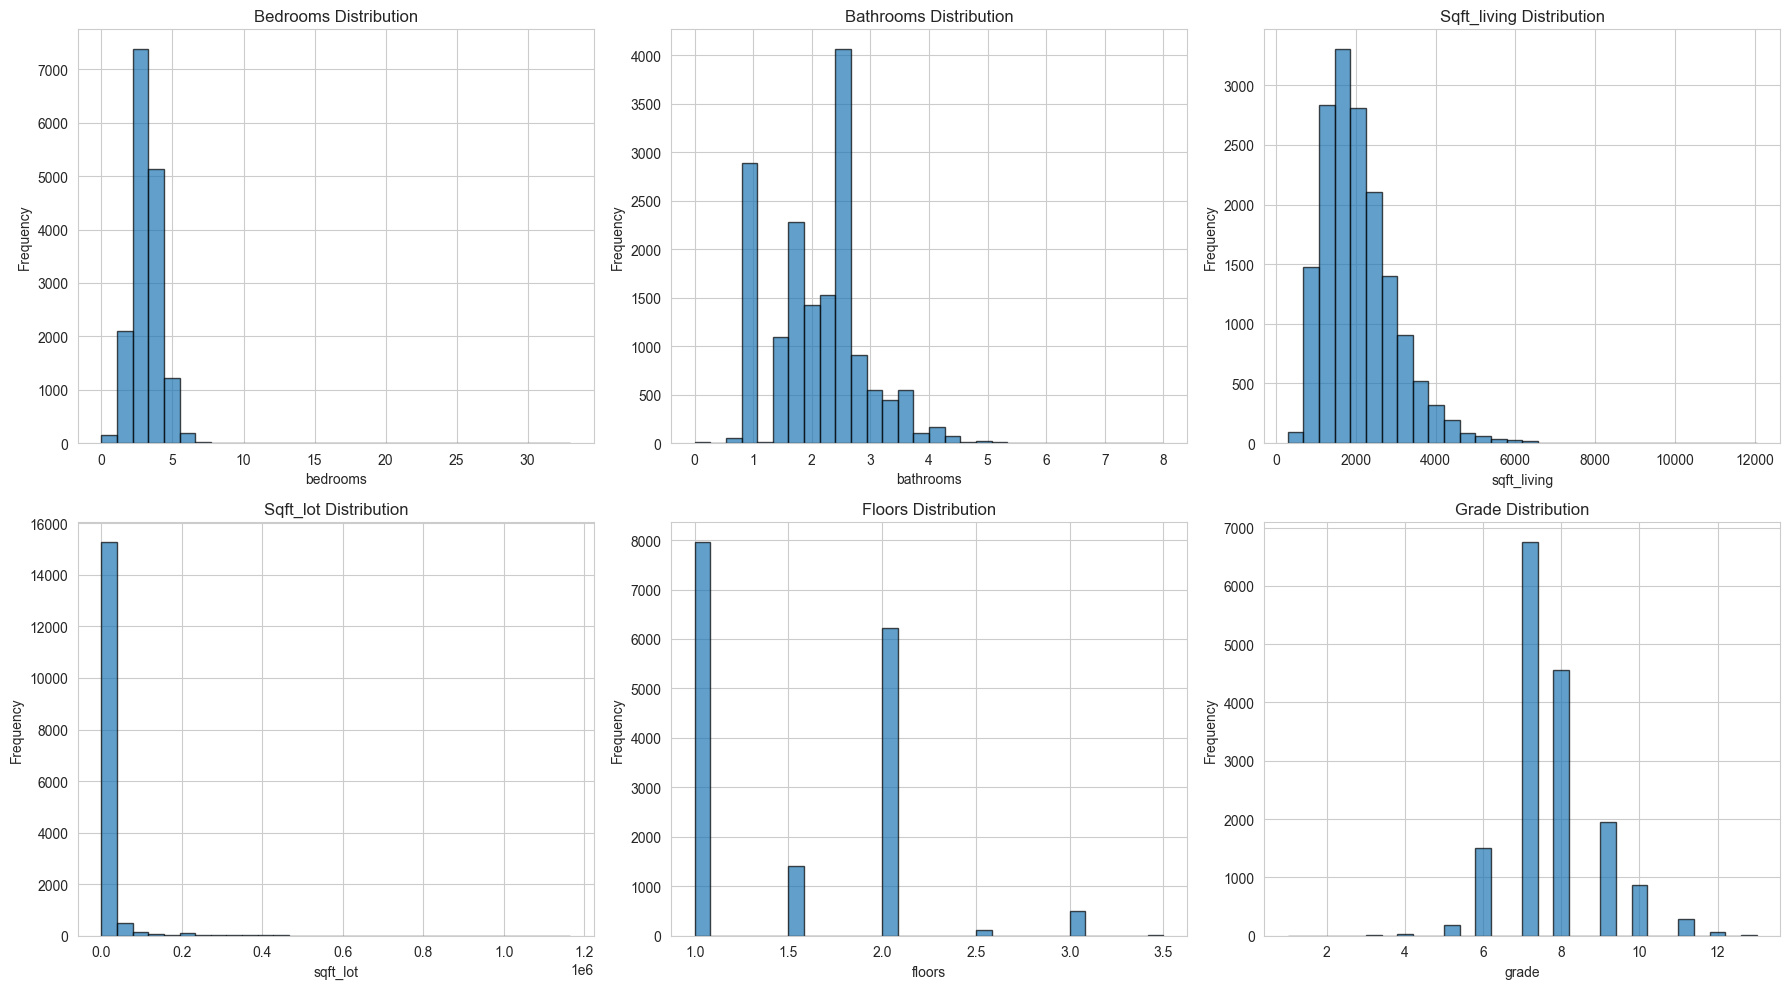

In [5]:
# Key feature distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

features_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade']

for idx, feature in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'{feature.capitalize()} Distribution')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


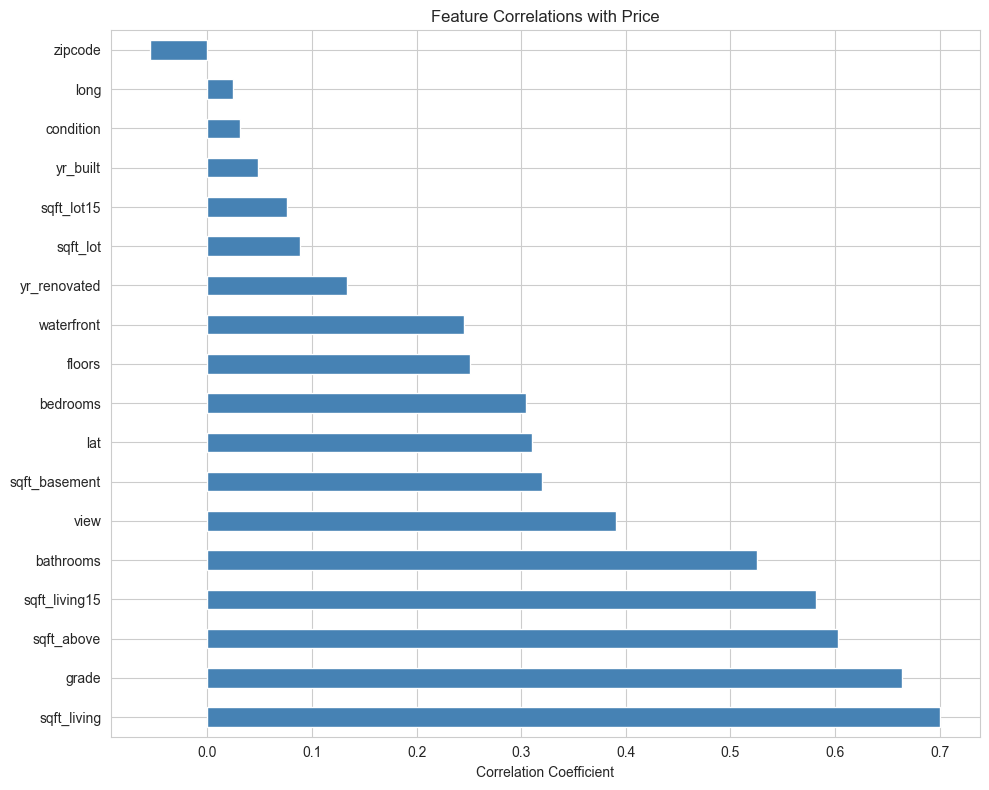

Top 10 features correlated with price:
sqft_living      0.700933
grade            0.664266
sqft_above       0.602648
sqft_living15    0.581781
bathrooms        0.525487
view             0.390534
sqft_basement    0.320301
lat              0.310008
bedrooms         0.304454
floors           0.251428
Name: price, dtype: float64


In [6]:
# Correlation analysis with target variable
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numeric_cols:
    numeric_cols.remove('id')

correlations = df[numeric_cols].corr()['price'].sort_values(ascending=False)
correlations = correlations[correlations.index != 'price']

plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='steelblue')
plt.title('Feature Correlations with Price')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

print("Top 10 features correlated with price:")
print(correlations.head(10))


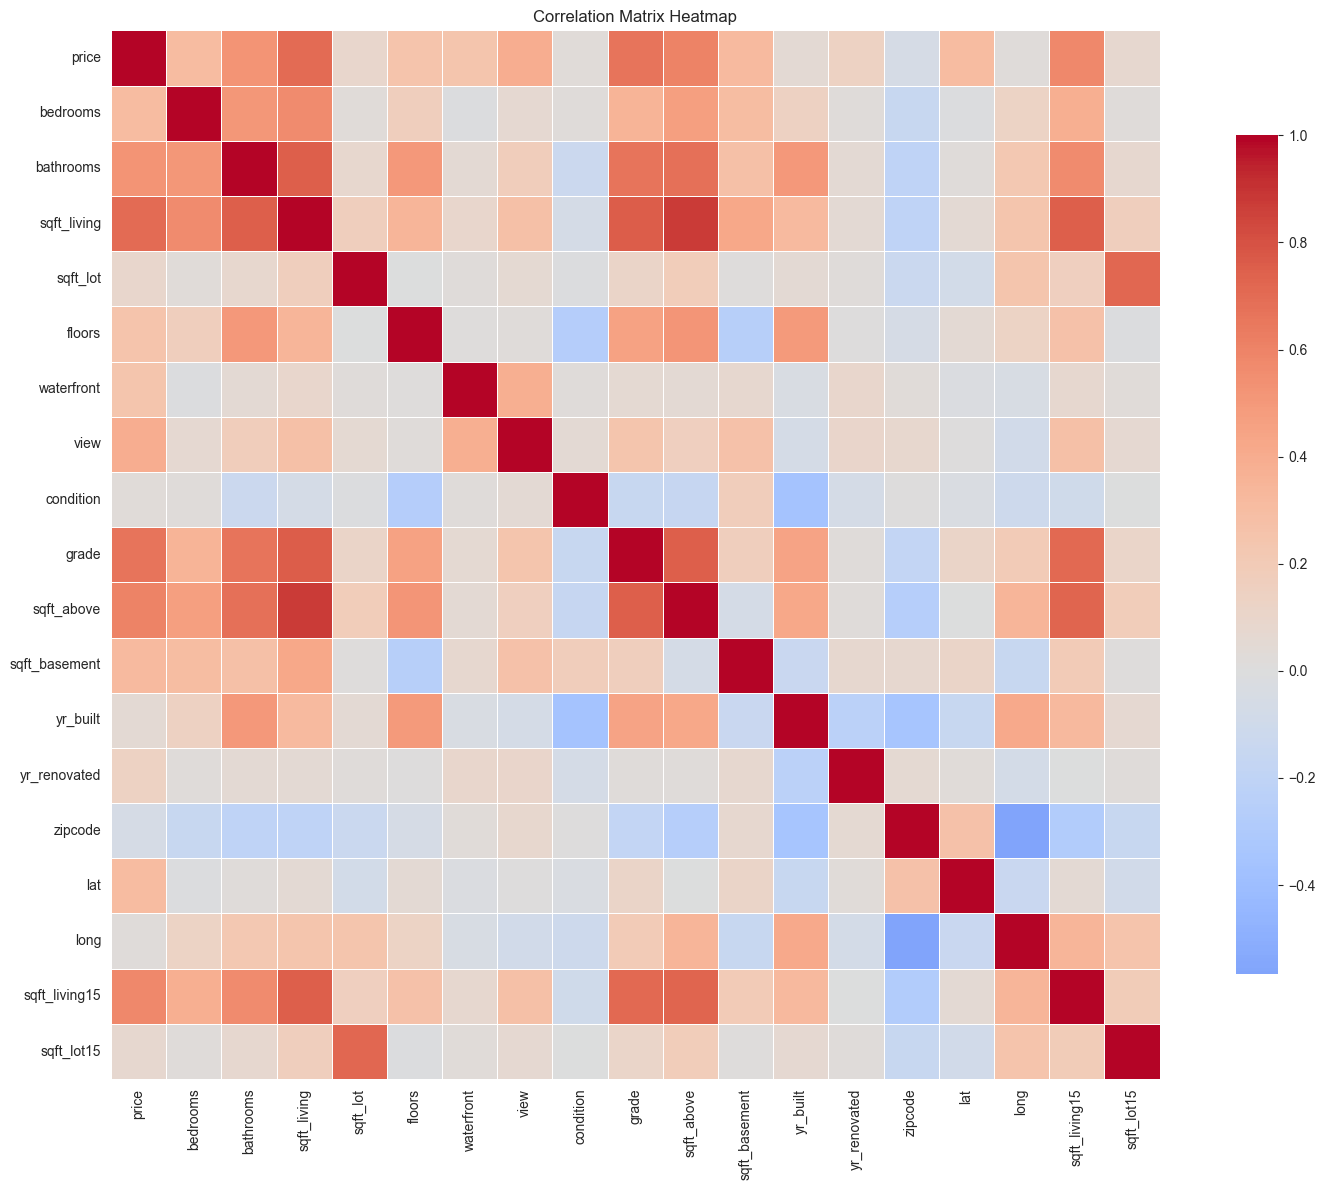

In [7]:
# Full correlation heatmap
numeric_cols_for_corr = [col for col in numeric_cols if col != 'id']
corr_matrix = df[numeric_cols_for_corr].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


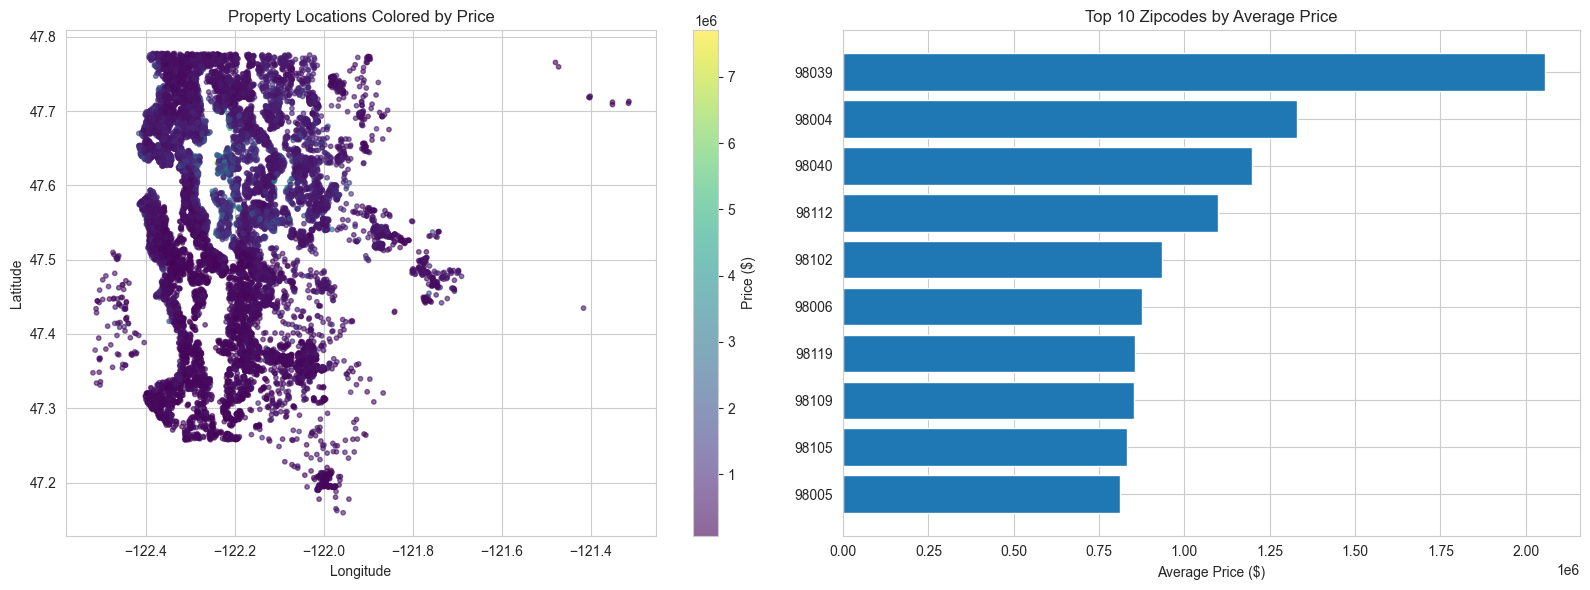

In [8]:
# Geospatial analysis - Price by location
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of locations colored by price
scatter = axes[0].scatter(df['long'], df['lat'], c=df['price'], 
                         cmap='viridis', alpha=0.6, s=10)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Property Locations Colored by Price')
plt.colorbar(scatter, ax=axes[0], label='Price ($)')

# Price distribution by zipcode (top 10)
if 'zipcode' in df.columns:
    top_zipcodes = df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10)
    axes[1].barh(range(len(top_zipcodes)), top_zipcodes.values)
    axes[1].set_yticks(range(len(top_zipcodes)))
    axes[1].set_yticklabels(top_zipcodes.index)
    axes[1].set_xlabel('Average Price ($)')
    axes[1].set_title('Top 10 Zipcodes by Average Price')
    axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


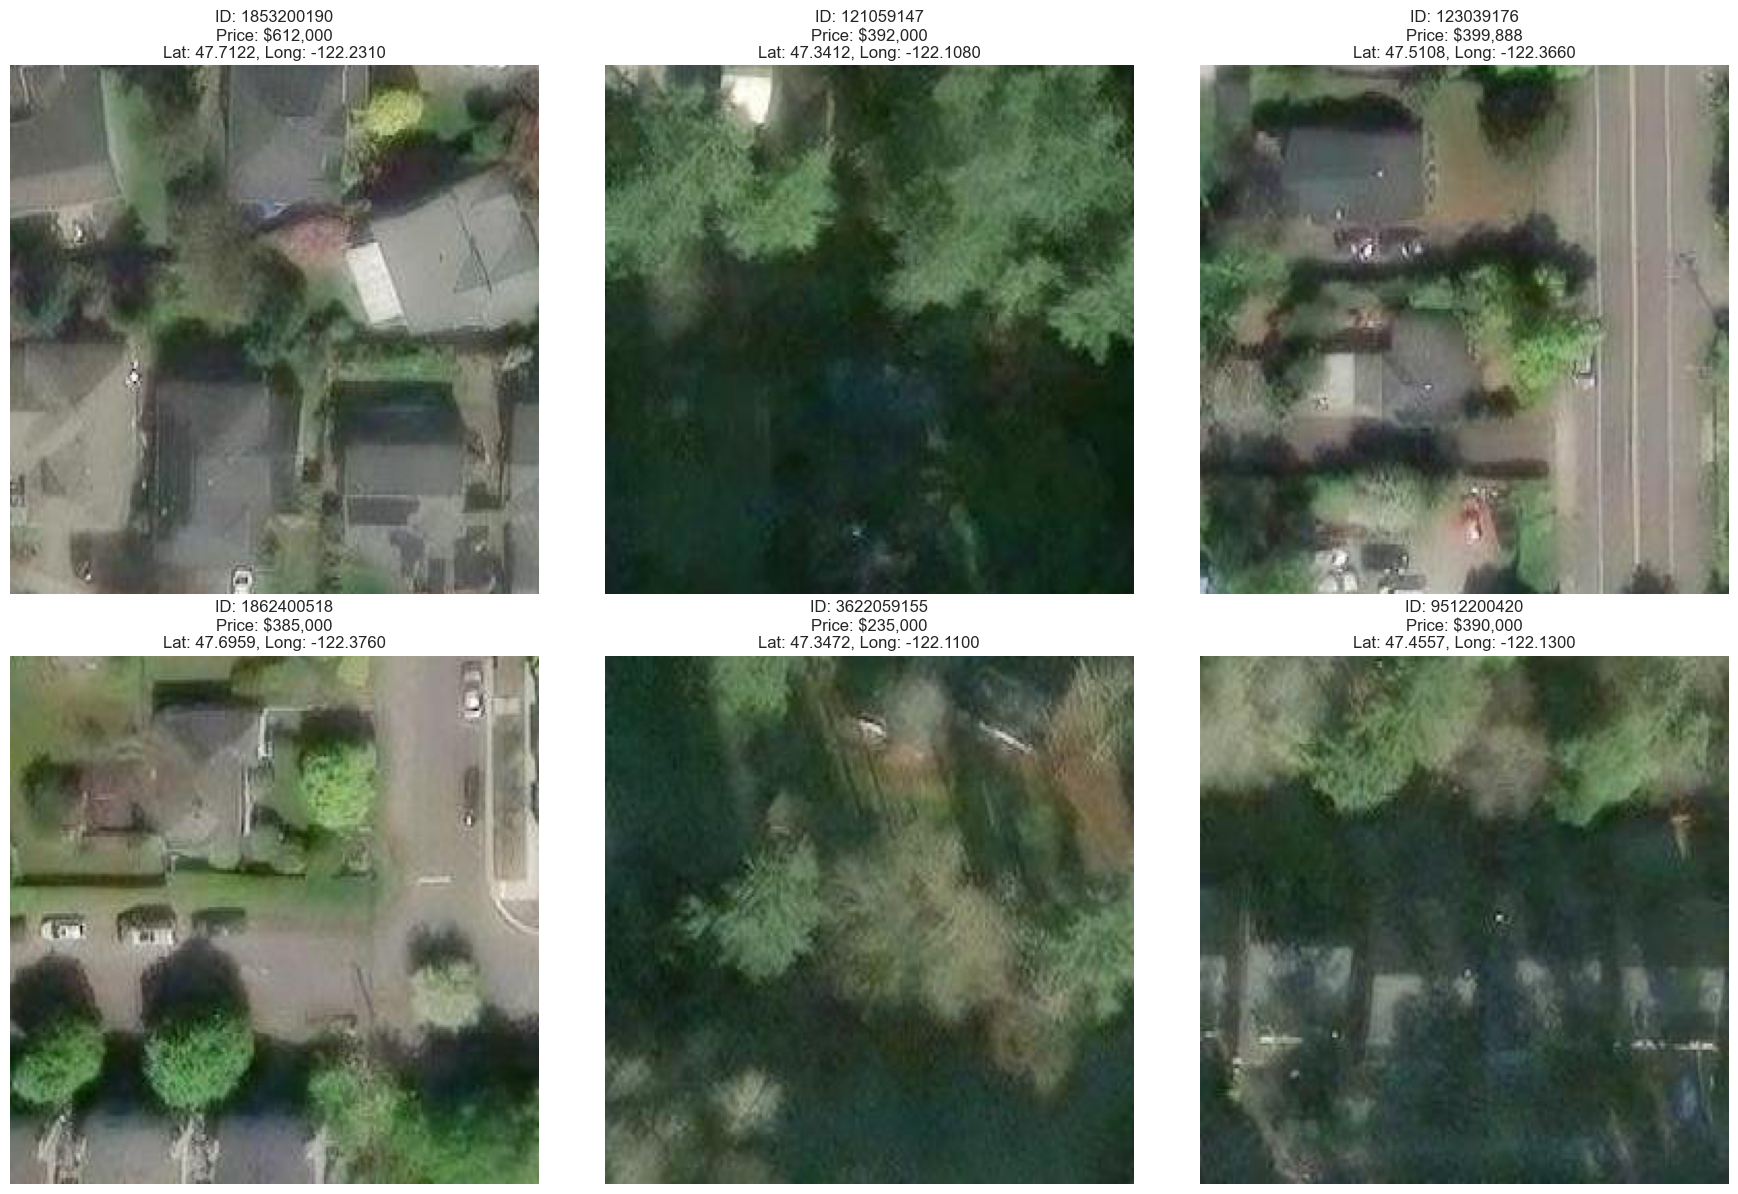

In [9]:
# Visualize sample satellite images
def visualize_sample_images(dataframe, n=6):
    """Display sample satellite images from the dataset"""
    sample = dataframe.sample(n=n, random_state=42)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for idx, (_, row) in enumerate(sample.iterrows()):
        img_path = os.path.join(IMAGE_DIR, f"{row['id']}.png")
        if os.path.exists(img_path):
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].set_title(f"ID: {row['id']}\nPrice: ${row['price']:,.0f}\n"
                              f"Lat: {row['lat']:.4f}, Long: {row['long']:.4f}")
            axes[idx].axis('off')
        else:
            axes[idx].text(0.5, 0.5, 'Image Not Found', ha='center', va='center')
            axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Check if images exist before visualizing
if os.path.exists(IMAGE_DIR):
    visualize_sample_images(df, n=6)
else:
    print(f"Image directory not found: {IMAGE_DIR}")


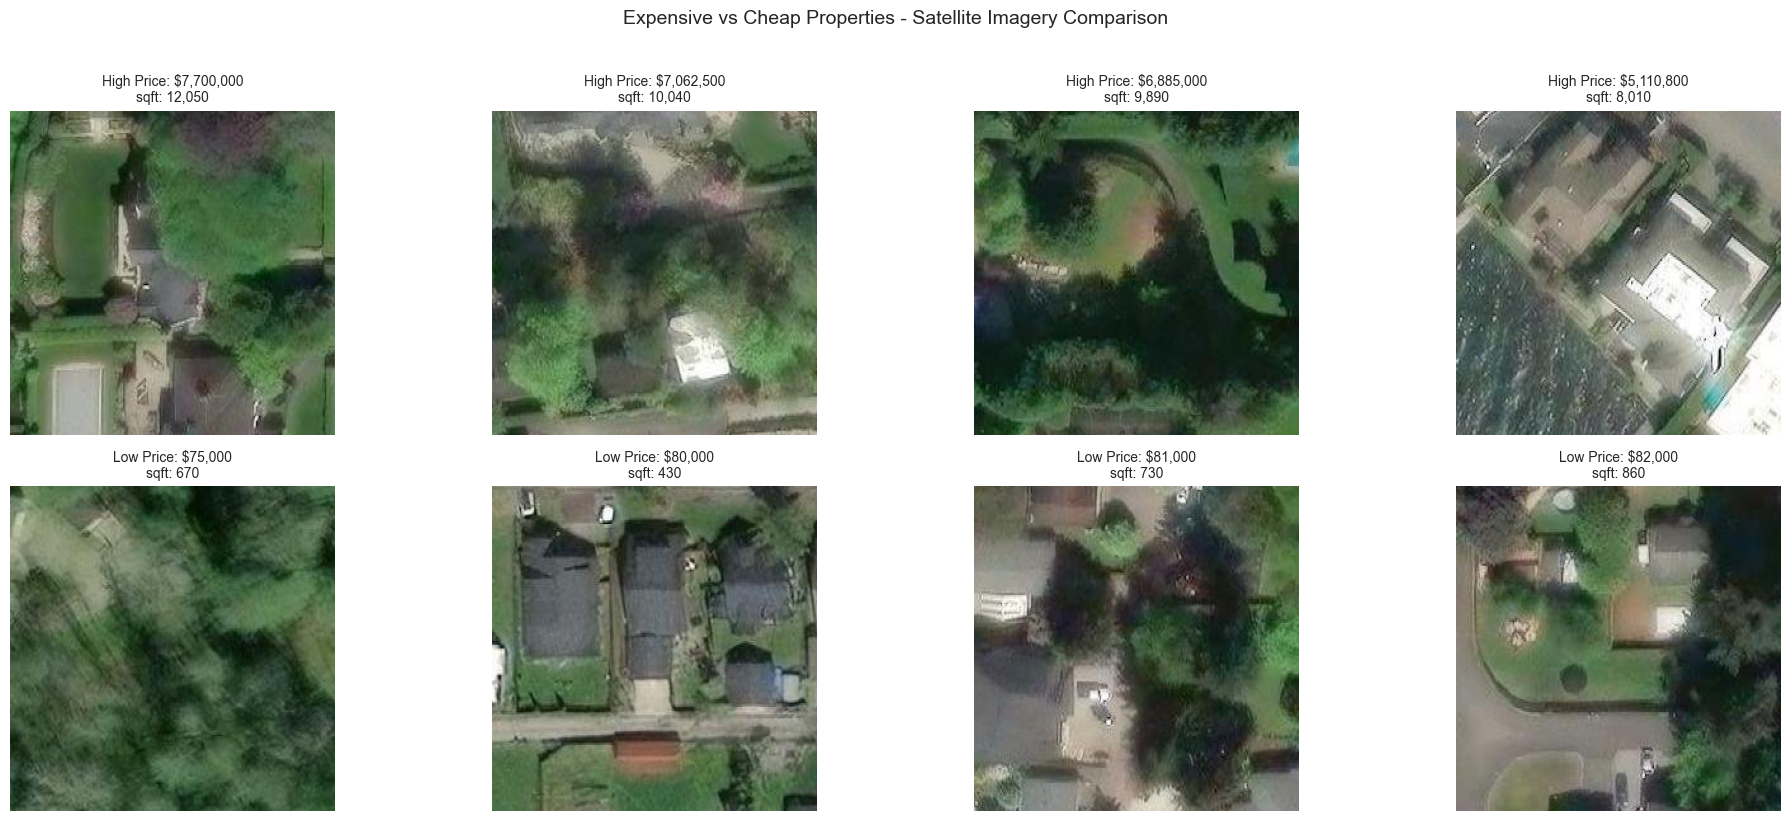

In [10]:
# Compare expensive vs cheap properties visually
def visualize_extremes(dataframe, n=4):
    expensive = dataframe.nlargest(n, 'price')
    cheap = dataframe.nsmallest(n, 'price')
    
    fig, axes = plt.subplots(2, n, figsize=(20, 8))
    
    for i in range(n):
        # Top Row: Expensive
        img_path_exp = os.path.join(IMAGE_DIR, f"{expensive.iloc[i]['id']}.png")
        if os.path.exists(img_path_exp):
            img_exp = Image.open(img_path_exp)
            axes[0, i].imshow(img_exp)
            axes[0, i].set_title(f"High Price: ${expensive.iloc[i]['price']:,.0f}\n"
                               f"sqft: {expensive.iloc[i]['sqft_living']:,.0f}", 
                               fontsize=10)
        else:
            axes[0, i].text(0.5, 0.5, 'Image Not Found', ha='center', va='center')
        axes[0, i].axis('off')
        
        # Bottom Row: Cheap
        img_path_chp = os.path.join(IMAGE_DIR, f"{cheap.iloc[i]['id']}.png")
        if os.path.exists(img_path_chp):
            img_chp = Image.open(img_path_chp)
            axes[1, i].imshow(img_chp)
            axes[1, i].set_title(f"Low Price: ${cheap.iloc[i]['price']:,.0f}\n"
                               f"sqft: {cheap.iloc[i]['sqft_living']:,.0f}", 
                               fontsize=10)
        else:
            axes[1, i].text(0.5, 0.5, 'Image Not Found', ha='center', va='center')
        axes[1, i].axis('off')

    plt.suptitle('Expensive vs Cheap Properties - Satellite Imagery Comparison', 
                 fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

if os.path.exists(IMAGE_DIR):
    visualize_extremes(df, n=4)


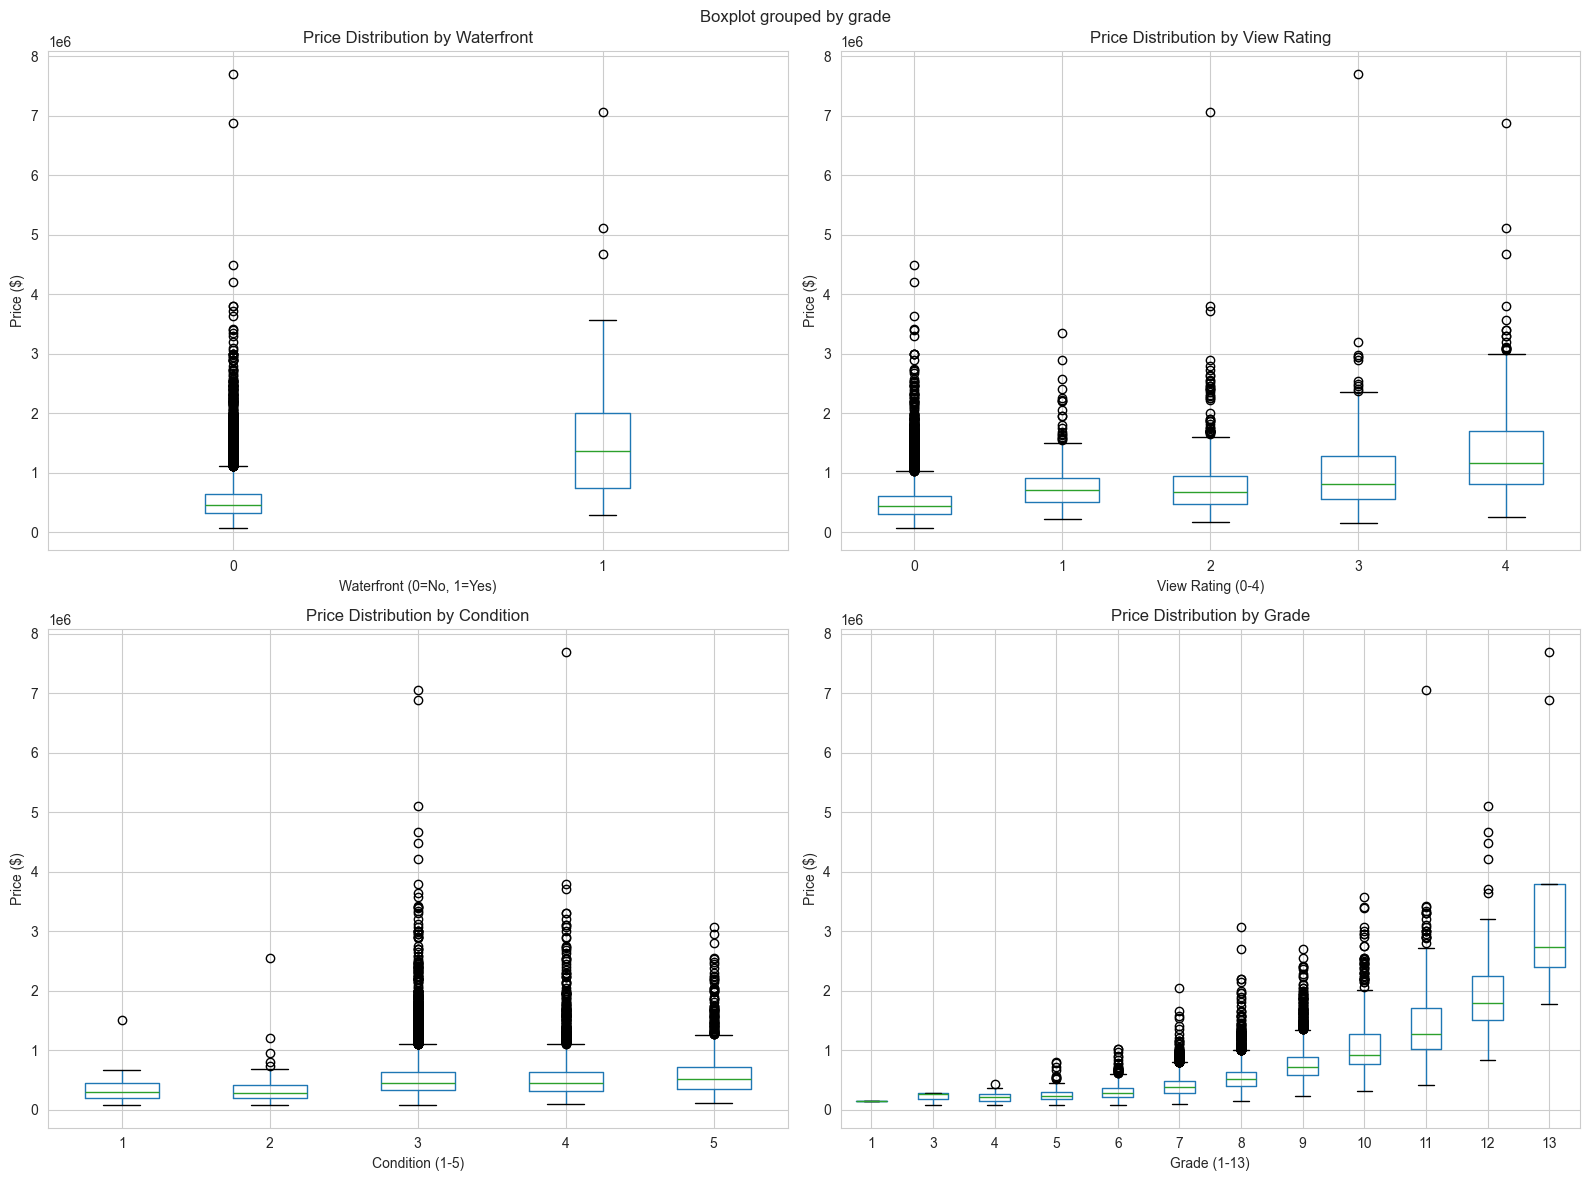

In [11]:
# Analyze price by categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Price by waterfront
if 'waterfront' in df.columns:
    df.boxplot(column='price', by='waterfront', ax=axes[0, 0])
    axes[0, 0].set_title('Price Distribution by Waterfront')
    axes[0, 0].set_xlabel('Waterfront (0=No, 1=Yes)')
    axes[0, 0].set_ylabel('Price ($)')

# Price by view
if 'view' in df.columns:
    df.boxplot(column='price', by='view', ax=axes[0, 1])
    axes[0, 1].set_title('Price Distribution by View Rating')
    axes[0, 1].set_xlabel('View Rating (0-4)')
    axes[0, 1].set_ylabel('Price ($)')

# Price by condition
if 'condition' in df.columns:
    df.boxplot(column='price', by='condition', ax=axes[1, 0])
    axes[1, 0].set_title('Price Distribution by Condition')
    axes[1, 0].set_xlabel('Condition (1-5)')
    axes[1, 0].set_ylabel('Price ($)')

# Price by grade
if 'grade' in df.columns:
    df.boxplot(column='price', by='grade', ax=axes[1, 1])
    axes[1, 1].set_title('Price Distribution by Grade')
    axes[1, 1].set_xlabel('Grade (1-13)')
    axes[1, 1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()


## 3. Data Cleaning and Preprocessing


In [12]:
# Create a copy for preprocessing
df_clean = df.copy()

# Verify image paths exist
def verify_image_path(prop_id):
    path = os.path.join(IMAGE_DIR, f"{prop_id}.png")
    return path if os.path.exists(path) else None

df_clean['image_path'] = df_clean['id'].apply(verify_image_path)

# Drop rows where image is missing
initial_count = len(df_clean)
df_clean = df_clean.dropna(subset=['image_path']).copy()
print(f"Initial rows: {initial_count}")
print(f"Rows with valid images: {len(df_clean)}")
print(f"Rows dropped: {initial_count - len(df_clean)}")


Initial rows: 16209
Rows with valid images: 16209
Rows dropped: 0


Outlier removal:
  Price limit (99th percentile): $1,944,600.00
  Rows before: 16209
  Rows after: 16046
  Rows removed: 163


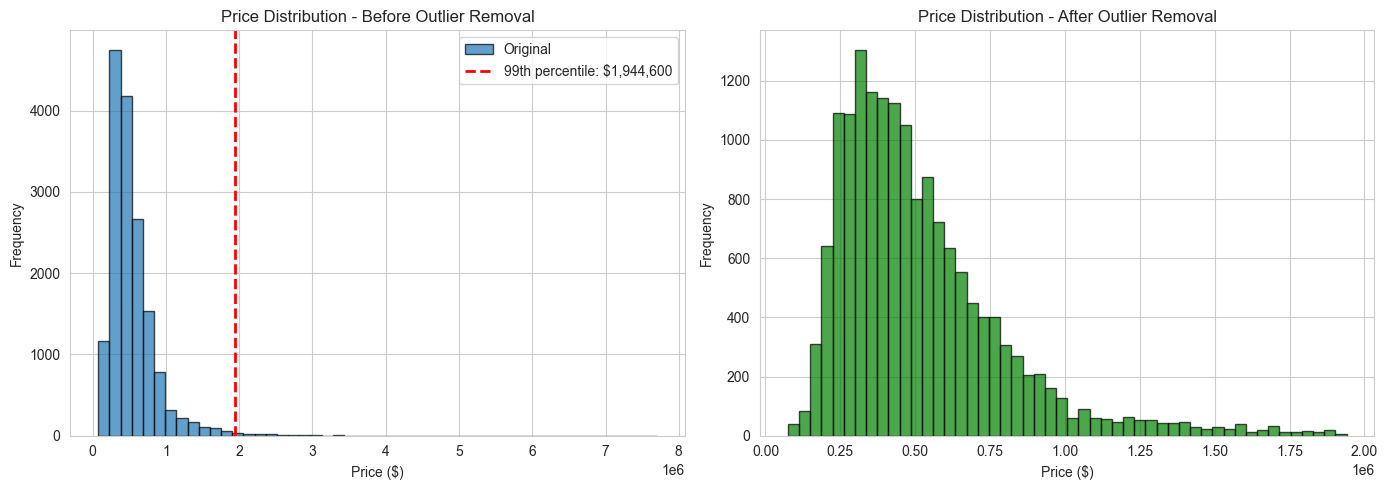

In [13]:

# Handle extreme outliers (Top 1% of prices)
price_before = len(df_clean)
price_limit = df_clean['price'].quantile(0.99)
df_clean = df_clean[df_clean['price'] < price_limit].copy()
print(f"Outlier removal:")
print(f"  Price limit (99th percentile): ${price_limit:,.2f}")
print(f"  Rows before: {price_before}")
print(f"  Rows after: {len(df_clean)}")
print(f"  Rows removed: {price_before - len(df_clean)}")

# Visualize outlier removal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7, label='Original')
axes[0].axvline(price_limit, color='r', linestyle='--', linewidth=2, label=f'99th percentile: ${price_limit:,.0f}')
axes[0].set_title('Price Distribution - Before Outlier Removal')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].hist(df_clean['price'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_title('Price Distribution - After Outlier Removal')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [14]:
# Check for missing values
print("Missing values in cleaned dataset:")
missing = df_clean.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print(missing)
else:
    print("No missing values found!")

# Handle any remaining missing values
if len(missing) > 0:
    # Fill numerical columns with median
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    print("\nMissing values filled!")


Missing values in cleaned dataset:
No missing values found!


## 4. Feature Engineering


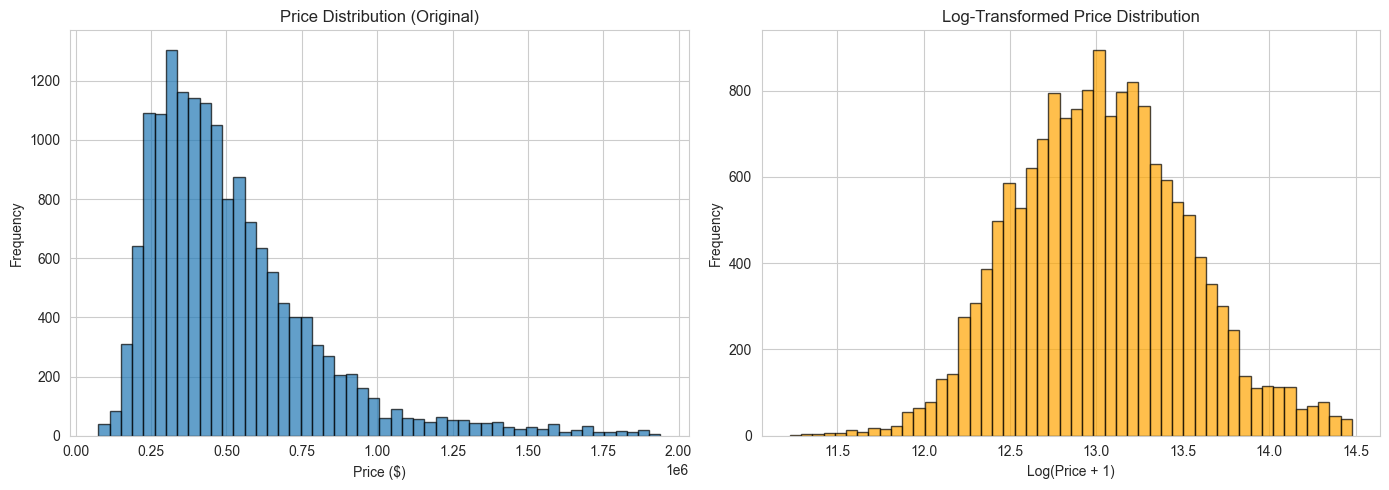

Original price skewness: 1.72
Log-transformed price skewness: 0.16


In [15]:
# Target transformation - Log transform for better model performance
df_clean['log_price'] = np.log1p(df_clean['price'])

# Visualize the transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df_clean['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Price Distribution (Original)')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_clean['log_price'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Log-Transformed Price Distribution')
axes[1].set_xlabel('Log(Price + 1)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Original price skewness: {df_clean['price'].skew():.2f}")
print(f"Log-transformed price skewness: {df_clean['log_price'].skew():.2f}")


In [16]:
# Log transform skewed features
skewed_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
for col in skewed_features:
    if col in df_clean.columns:
        df_clean[col + '_log'] = np.log1p(df_clean[col])
        print(f"Created {col}_log (skewness: {df_clean[col].skew():.2f} -> {df_clean[col + '_log'].skew():.2f})")


Created sqft_living_log (skewness: 1.04 -> -0.12)
Created sqft_lot_log (skewness: 11.21 -> 0.94)
Created sqft_above_log (skewness: 1.24 -> 0.21)
Created sqft_basement_log (skewness: 1.47 -> 0.51)
Created sqft_living15_log (skewness: 1.05 -> 0.17)
Created sqft_lot15_log (skewness: 8.76 -> 0.98)


In [17]:
# Geospatial feature engineering
# Calculate distance from dataset center (location premium)
center_lat = df_clean['lat'].mean()
center_long = df_clean['long'].mean()

df_clean['dist_from_center'] = np.sqrt(
    (df_clean['lat'] - center_lat)**2 + (df_clean['long'] - center_long)**2
)

print(f"Dataset center: ({center_lat:.4f}, {center_long:.4f})")
print(f"Distance from center - Min: {df_clean['dist_from_center'].min():.4f}, "
      f"Max: {df_clean['dist_from_center'].max():.4f}, "
      f"Mean: {df_clean['dist_from_center'].mean():.4f}")


Dataset center: (47.5601, -122.2138)
Distance from center - Min: 0.0018, Max: 0.9117, Mean: 0.1801


In [18]:
# Calculate distance to luxury hub (top 5% properties)
lux_threshold = df_clean['price'].quantile(0.95)
luxury_properties = df_clean[df_clean['price'] >= lux_threshold]
hub_lat = luxury_properties['lat'].mean()
hub_long = luxury_properties['long'].mean()

df_clean['dist_to_hub'] = np.sqrt(
    (df_clean['lat'] - hub_lat)**2 + (df_clean['long'] - hub_long)**2
)

print(f"Luxury hub location: ({hub_lat:.4f}, {hub_long:.4f})")
print(f"Distance to hub - Min: {df_clean['dist_to_hub'].min():.4f}, "
      f"Max: {df_clean['dist_to_hub'].max():.4f}, "
      f"Mean: {df_clean['dist_to_hub'].mean():.4f}")


Luxury hub location: (47.6156, -122.2234)
Distance to hub - Min: 0.0020, Max: 0.9136, Mean: 0.1834


In [19]:
# House age feature
if 'yr_built' in df_clean.columns:
    df_clean['house_age'] = 2015 - df_clean['yr_built']
    print(f"House age - Min: {df_clean['house_age'].min()}, "
          f"Max: {df_clean['house_age'].max()}, "
          f"Mean: {df_clean['house_age'].mean():.1f}")

# Renovation indicator
if 'yr_renovated' in df_clean.columns:
    df_clean['is_renovated'] = (df_clean['yr_renovated'] > 0).astype(int)
    print(f"Renovated properties: {df_clean['is_renovated'].sum()} ({df_clean['is_renovated'].mean()*100:.1f}%)")


House age - Min: 0, Max: 115, Mean: 43.8
Renovated properties: 647 (4.0%)


In [20]:
# Feature ratios and interactions
# Price per square foot
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft_living']
df_clean['price_per_sqft_lot'] = df_clean['price'] / df_clean['sqft_lot']

# Living space ratio
df_clean['living_ratio'] = df_clean['sqft_living'] / df_clean['sqft_lot']

# Above ground ratio
if 'sqft_above' in df_clean.columns and 'sqft_living' in df_clean.columns:
    df_clean['above_ratio'] = df_clean['sqft_above'] / df_clean['sqft_living']

# Bedroom to bathroom ratio
df_clean['bed_bath_ratio'] = df_clean['bedrooms'] / (df_clean['bathrooms'] + 0.1)  # Add small value to avoid division by zero

print("Created feature ratios:")
print(f"  - price_per_sqft")
print(f"  - price_per_sqft_lot")
print(f"  - living_ratio")
print(f"  - above_ratio")
print(f"  - bed_bath_ratio")


Created feature ratios:
  - price_per_sqft
  - price_per_sqft_lot
  - living_ratio
  - above_ratio
  - bed_bath_ratio


In [21]:
# Neighborhood density features (comparison with neighbors)
if 'sqft_living15' in df_clean.columns:
    df_clean['sqft_living_vs_neighbors'] = df_clean['sqft_living'] / (df_clean['sqft_living15'] + 1)
    df_clean['sqft_lot_vs_neighbors'] = df_clean['sqft_lot'] / (df_clean['sqft_lot15'] + 1)
    print("Created neighborhood comparison features")

# Summary of all engineered features
engineered_features = [
    'log_price', 'dist_from_center', 'dist_to_hub', 'house_age', 
    'is_renovated', 'price_per_sqft', 'price_per_sqft_lot', 
    'living_ratio', 'above_ratio', 'bed_bath_ratio',
    'sqft_living_vs_neighbors', 'sqft_lot_vs_neighbors'
]

print(f"\nTotal engineered features: {len([f for f in engineered_features if f in df_clean.columns])}")


Created neighborhood comparison features

Total engineered features: 12


## 5. Feature Standardization


In [22]:
from sklearn.preprocessing import StandardScaler

# Select features for standardization (tabular features)
feat_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'lat', 'long']

# Create scaler and fit-transform
scaler = StandardScaler()
df_clean[feat_cols] = scaler.fit_transform(df_clean[feat_cols])

print("Features standardized:")
for col in feat_cols:
    print(f"  {col}: mean={df_clean[col].mean():.4f}, std={df_clean[col].std():.4f}")

# Save scaler for later use
import joblib
joblib.dump(scaler, 'feature_scaler.pkl')
print("\nScaler saved to 'feature_scaler.pkl'")


Features standardized:
  bedrooms: mean=-0.0000, std=1.0000
  bathrooms: mean=0.0000, std=1.0000
  sqft_living: mean=0.0000, std=1.0000
  sqft_lot: mean=-0.0000, std=1.0000
  floors: mean=-0.0000, std=1.0000
  lat: mean=0.0000, std=1.0000
  long: mean=0.0000, std=1.0000

Scaler saved to 'feature_scaler.pkl'


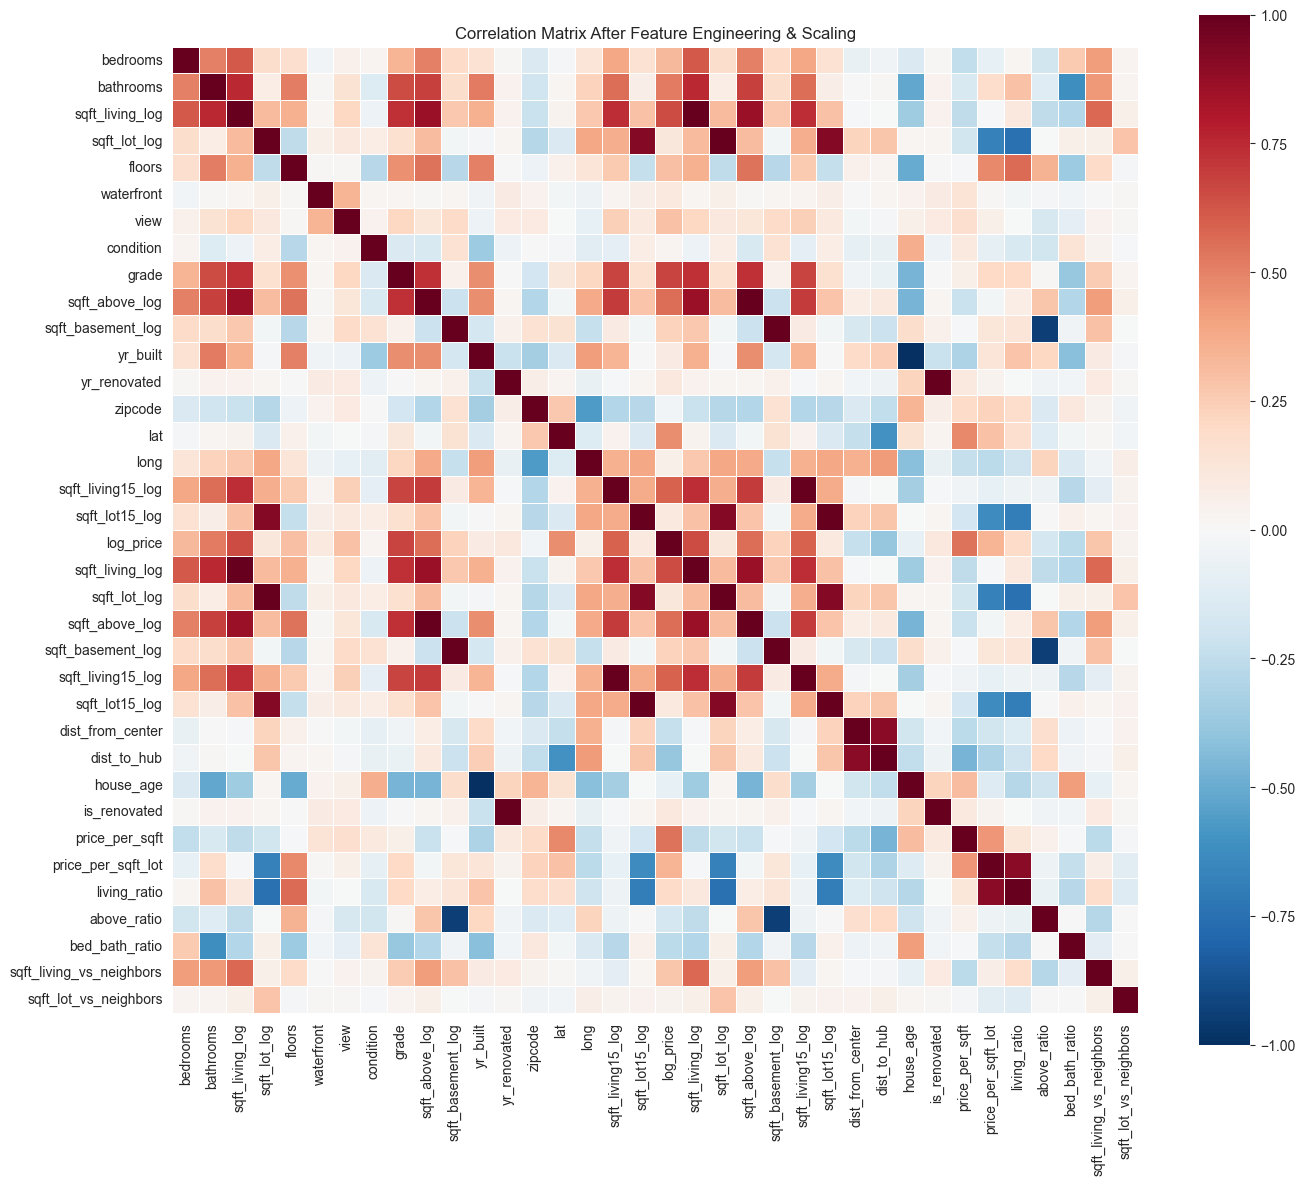

In [23]:
# Correlation matrix after feature engineering
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in num_cols:
    num_cols.remove('id')

# Use log-transformed versions for correlation
transform_cols = []
for col in num_cols:
    if col + '_log' in df_clean.columns:
        transform_cols.append(col + '_log')
    elif col not in ['price', 'image_path']:  # Exclude original price and image_path
        transform_cols.append(col)

# Create scaled dataframe for correlation
scaler_corr = StandardScaler()
df_scaled = pd.DataFrame(
    scaler_corr.fit_transform(df_clean[transform_cols]), 
    columns=transform_cols
)

# Generate correlation matrix
corr_matrix = df_scaled.corr()

# Visualize
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0, 
            fmt='.2f', linewidths=0.5, square=True)
plt.title("Correlation Matrix After Feature Engineering & Scaling")
plt.tight_layout()
plt.show()


## 6. Final Data Validation and Export


In [24]:
# Final data summary
print("="*50)
print("FINAL PREPROCESSED DATASET SUMMARY")
print("="*50)
print(f"Total rows: {len(df_clean)}")
print(f"Total columns: {len(df_clean.columns)}")
print(f"\nTarget variable: log_price")
print(f"  Original price range: ${df_clean['price'].min():,.0f} - ${df_clean['price'].max():,.0f}")
print(f"  Log price range: {df_clean['log_price'].min():.2f} - {df_clean['log_price'].max():.2f}")

print(f"\nKey features available:")
key_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                'lat', 'long', 'waterfront', 'view', 'grade', 'condition',
                'dist_from_center', 'dist_to_hub', 'house_age']
for feat in key_features:
    if feat in df_clean.columns:
        print(f"  ✓ {feat}")

print(f"\nEngineered features:")
for feat in engineered_features:
    if feat in df_clean.columns:
        print(f"  ✓ {feat}")


FINAL PREPROCESSED DATASET SUMMARY
Total rows: 16046
Total columns: 40

Target variable: log_price
  Original price range: $75,000 - $1,940,000
  Log price range: 11.23 - 14.48

Key features available:
  ✓ bedrooms
  ✓ bathrooms
  ✓ sqft_living
  ✓ sqft_lot
  ✓ floors
  ✓ lat
  ✓ long
  ✓ waterfront
  ✓ view
  ✓ grade
  ✓ condition
  ✓ dist_from_center
  ✓ dist_to_hub
  ✓ house_age

Engineered features:
  ✓ log_price
  ✓ dist_from_center
  ✓ dist_to_hub
  ✓ house_age
  ✓ is_renovated
  ✓ price_per_sqft
  ✓ price_per_sqft_lot
  ✓ living_ratio
  ✓ above_ratio
  ✓ bed_bath_ratio
  ✓ sqft_living_vs_neighbors
  ✓ sqft_lot_vs_neighbors


In [25]:
# Save preprocessed data
from sklearn.model_selection import train_test_split

# Split data
train_df, val_df = train_test_split(df_clean, test_size=0.2, random_state=42)

# Save to CSV
train_df.to_csv("train_preprocessed.csv", index=False)
val_df.to_csv("val_preprocessed.csv", index=False)

print("="*50)
print("PREPROCESSING COMPLETE!")
print("="*50)
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"\nFiles saved:")
print(f"  - train_preprocessed.csv")
print(f"  - val_preprocessed.csv")
print(f"  - feature_scaler.pkl")
print("="*50)


PREPROCESSING COMPLETE!
Training samples: 12836
Validation samples: 3210

Files saved:
  - train_preprocessed.csv
  - val_preprocessed.csv
  - feature_scaler.pkl
